# Generalised Linear Model

#### This program develops a model that has been trained over a number of training examples (each of the examples having 4 features and 1 target value) and can subsequently predict the target value for any test input given. This is a linear regression problem and the learning algorithm used is Gradient Descent Method.

In [199]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [200]:
'''Arguments:
        Hypothesis matrix which is the set of predicted outputs
        Target matrix which is the set of actual outputs for the training data
        Number of training examples
    Returns:
        The value of cost function for a particular hypothesis function'''
def computeCostFunction(hyp, tar, m):
    sum = 0
    for j in range(m):
        sum+=(hyp[j][0]-tar[j][0])**2
    cost = sum/(2*m)
    return cost

In [201]:
#The CSV files for training_data and test_input are converted to ndarrays
train_data = genfromtxt('G:\MyPrograms\ML_IEEE_SMP\Assignment3\\train_data.csv', delimiter = ",")
test_input = genfromtxt('G:\MyPrograms\ML_IEEE_SMP\Assignment3\\test_input.csv', delimiter = ",")

In [202]:
#The first row containing the column names is deleted from the train_data and test_input ndarrays
train_data = np.delete(train_data, (0), axis = 0)
test_input = np.delete(test_input, (0), axis = 0)

In [203]:
m = len(train_data) #Number of training examples
bias = np.ones(m)
train_data= np.insert(train_data, 0, bias, axis = 1) #First column of 1s is inserted


In [204]:
target = train_data[:,5] 
target = (np.array(target, ndmin = 2)).transpose()#Storing the target values in a separate vector
train_data = np.delete(train_data, 5, axis = 1) #train_data now only contains the feature columns and the bias column

In [205]:
parameters = np.zeros([1, 5])
parametersTranspose = parameters.transpose()#Parameters vector

In [206]:
hypothesis = np.dot(train_data, parametersTranspose) #h(x) = (train_data)*(Parameters vector)
differenceArray = np.subtract(hypothesis, target) #Each element of differenceArray = h(x(i))-y(i)

In [207]:
learningRate = 0.1 #Alpha
initialCost = computeCostFunction(hypothesis, target, m)
save = initialCost
costValuesArray = [save]
noOfIterations = [0]
iterNo = 0
updatedParameters = np.zeros([1, 5])
while True:    
    for i in range(5):
        ithFeatureColumn = train_data[:,i]
        updatedParameters[0][i] = updatedParameters[0][i] - (learningRate/m)*(np.dot(ithFeatureColumn.transpose(), differenceArray))
    
    hypothesis = np.dot(train_data, updatedParameters.transpose())
    cost = computeCostFunction(hypothesis, target, m)
    iterNo+=1
    noOfIterations.append(iterNo)
    costValuesArray.append(cost)
    if abs(cost-save)<=0.001*save:
        break
    if cost>save:
        break
    else:
        save = cost
        differenceArray = np.subtract(hypothesis, target)
    

In [208]:
print costValuesArray

[10.458954370298338, 6.6700909392451546, 4.2783027459170642, 2.7680128173748839, 1.8139203545489666, 1.2107782580526594, 0.82908664876851457, 0.58713794111413009, 0.43337883747576905, 0.33528172664041594, 0.27232315445737587, 0.23155362886893199, 0.20480241294213375, 0.18691390448298337, 0.17463488946579958, 0.16591246067595014, 0.15945104328537563, 0.15443290250718478, 0.15034179935998584, 0.14685172715974151, 0.14375671033614859, 0.14092651129581388, 0.1382786838249894, 0.13576094025206462, 0.13334002602093967, 0.13099470008061267, 0.12871130581816315, 0.1264809764821517, 0.12429787188010508, 0.122158065754071, 0.12005884369927945, 0.11799826011406905, 0.11597485858549805, 0.11398749539511663, 0.11203522808913546, 0.11011724510189108, 0.10823282128291682, 0.10638128976898349, 0.1045620241701208, 0.10277442726437529, 0.10101792380039171, 0.099291955892946662, 0.097595980055621659, 0.095929465267526673, 0.094291891693539062, 0.092682749817942625, 0.091101539839948717, 0.089547771235480

In [209]:
plt.plot(noOfIterations, costValuesArray)

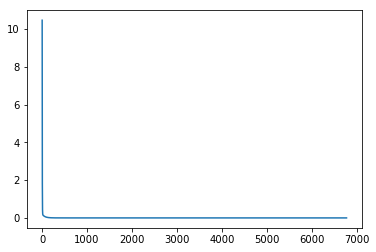

In [210]:
plt.show()#Plot between cost function(y axis) and number of iterations(x axis)

## Predicting for test input

In [211]:
bias = np.ones(len(test_input))
test_input= np.insert(test_input, 0, bias, axis = 1) #First column of 1s is inserted


predictedOutput = np.dot(test_input, updatedParameters.transpose())
print predictedOutput

[[ 3.31498528]
 [ 5.87658328]
 [ 5.02224661]
 [ 6.2932576 ]
 [ 6.16237451]
 [ 4.57690989]
 [ 6.24863902]
 [ 4.26387364]
 [ 2.99450781]
 [ 3.95151383]
 [ 4.72510639]
 [ 5.23181676]
 [ 4.74309125]
 [ 5.60377019]
 [ 3.87350668]
 [ 5.69381539]
 [ 3.24284863]
 [ 6.12640529]
 [ 6.26386762]
 [ 3.33960818]
 [ 4.53534819]
 [ 4.3900155 ]
 [ 5.31416061]
 [ 5.20330632]
 [ 3.00609464]
 [ 4.89242042]
 [ 5.2699208 ]
 [ 5.02511314]
 [ 2.64666871]
 [ 5.12820951]
 [ 5.27623116]
 [ 6.11490239]
 [ 4.72264555]
 [ 6.03008009]
 [ 5.99675583]
 [ 4.60813235]
 [ 5.14592651]
 [ 3.55465433]
 [ 3.55671684]
 [ 5.74704329]
 [ 5.93366987]
 [ 3.40549325]
 [ 4.90453343]
 [ 6.05682175]
 [ 4.09401931]
 [ 6.09221509]
 [ 3.49072919]
 [ 4.59400856]
 [ 3.70131438]
 [ 5.2334423 ]
 [ 5.62853115]
 [ 5.67626599]
 [ 4.80006167]
 [ 4.70863576]
 [ 5.30914692]
 [ 5.01977707]
 [ 5.67022895]
 [ 4.94513404]
 [ 4.06941732]
 [ 5.54961013]]
